In [1]:
import pandas as pd
import glob

In [2]:
import tensorflow as tf
tf.__version__

2023-05-18 08:02:54.064819: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.12.0'

In [2]:
CER = pd.read_csv('./data/CER.csv', parse_dates=True)
natural_gas = pd.read_csv('./data/natural_gas.csv', parse_dates=True)
coal = pd.read_csv('./data/Newcastle_Coal.csv', parse_dates=True)
wti = pd.read_csv('./data/WTI.csv', parse_dates=True)

In [3]:
c = [CER, natural_gas, coal, wti]
columns = ['date','close','open','high','low','volume','return']
for i in c:
  i.columns = columns

In [4]:
CER

,date,close,open,high,low,volume,return
0,2022- 12- 30,79.40,82.00,82.80,78.23,1.80K,-3.59%
1,2022- 12- 29,82.36,83.85,83.85,81.87,0.47K,-2.10%
2,2022- 12- 28,84.13,86.02,86.02,83.85,0.90K,-2.27%
3,2022- 12- 27,86.08,85.92,88.50,85.55,0.30K,-0.89%
4,2022- 12- 23,86.85,87.46,88.05,86.08,0.33K,0.00%
...,...,...,...,...,...,...,...
252,2022- 01- 07,85.42,86.80,87.61,85.21,15.83K,-1.52%
253,2022- 01- 06,86.74,87.47,87.80,85.33,13.39K,-0.96%
254,2022- 01- 05,87.58,85.90,88.55,85.27,20.64K,3.14%
255,2022- 01- 04,84.91,83.95,86.80,83.81,17.53K,1.07%


In [5]:
from datetime import datetime
def strp(x):
  if x[0].isnumeric() == True:
    answer = datetime.strptime(x, "%Y- %m- %d")
  else:
    answer = datetime.strptime(x, "%b %d, %Y")
  return answer

# 날짜변환
CER['date'] = CER['date'].apply(lambda x:strp(x))
natural_gas['date'] = natural_gas['date'].apply(lambda x:strp(x))
coal['date'] = coal['date'].apply(lambda x:strp(x))
wti['date'] = wti['date'].apply(lambda x:strp(x))

# 병합전
CER = CER.rename(columns={"close":"CER"})[['date','CER']]
natural_gas = natural_gas.rename(columns={"close":"natural_gas"})[['date','natural_gas']]
coal = coal.rename(columns={"close":"coal"})[['date','coal']]
wti = wti.rename(columns={"close":"wti"})[['date','wti']]

# 병합
df = pd.merge(left = CER, right=natural_gas, on='date')
df = pd.merge(left = df, right=coal, on='date')
df = pd.merge(left = df, right=wti, on='date')
df = df.sort_values(by='date',ascending=True).set_index('date')

data = df.copy()
data

,CER,natural_gas,coal,wti
date,,,,
2022-01-03,84.01,3.815,157.50,76.08
2022-01-04,84.91,3.717,174.10,76.99
2022-01-05,87.58,3.882,179.90,77.85
2022-01-06,86.74,3.812,196.50,79.46
2022-01-07,85.42,3.916,195.90,78.90
...,...,...,...,...
2022-12-23,86.85,4.980,401.10,79.34
2022-12-27,86.08,5.282,400.50,79.77
2022-12-28,84.13,4.709,402.10,78.60


In [6]:
import matplotlib.pyplot as plt
import numpy as np

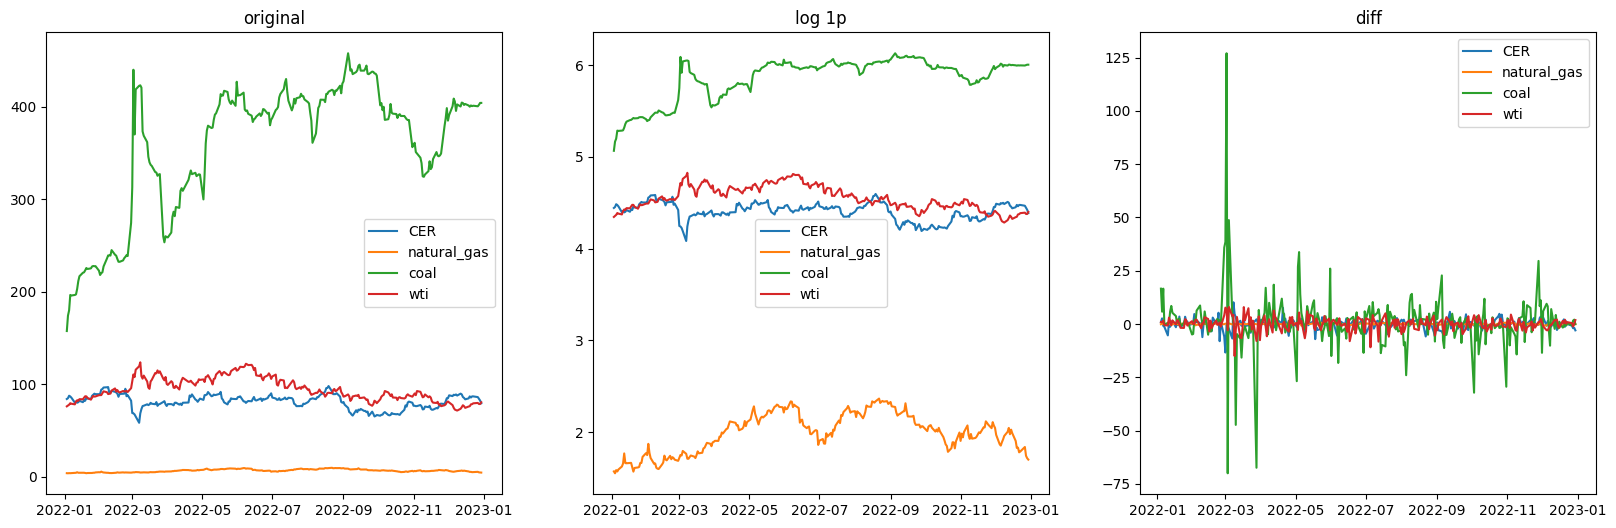

In [7]:
fig, axes = plt.subplots(ncols=3, figsize=(20,6))

axes[0].plot(df) # 변동성
axes[1].plot(np.log1p(df)) # 로그 변환은 데이터의 스케일을 조정하고, 대체로 정규 분포 형태에 가깝게 , 데이터 분포와 패턴이 어떻게 변하는지 확인
axes[2].plot(df.diff()) # 데이터의 변화율이나 추세 변화

axes[0].set_title('original')
axes[1].set_title("log 1p")
axes[2].set_title("diff")

for ax in axes:
  ax.legend(['CER','natural_gas','coal', 'wti'])

In [8]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data_scaled = mm.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns= ['CER','natural_gas','coal', 'wti'])
data_scaled

,CER,natural_gas,coal,wti
date,,,,
2022-01-03,0.647444,0.016526,0.000000,0.087739
2022-01-04,0.670108,0.000000,0.055278,0.105172
2022-01-05,0.737346,0.027825,0.074592,0.121648
2022-01-06,0.716192,0.016020,0.129870,0.152490
2022-01-07,0.682951,0.033558,0.127872,0.141762
...,...,...,...,...
2022-12-23,0.718962,0.212985,0.811189,0.150192
2022-12-27,0.699572,0.263912,0.809191,0.158429
2022-12-28,0.650466,0.167285,0.814519,0.136015


In [9]:
#!pip install -U scikit-learn

In [10]:
print(mm.data_max_, mm.data_min_)

[ 98.01    9.647 457.8   123.7  ] [ 58.3     3.717 157.5    71.5  ]


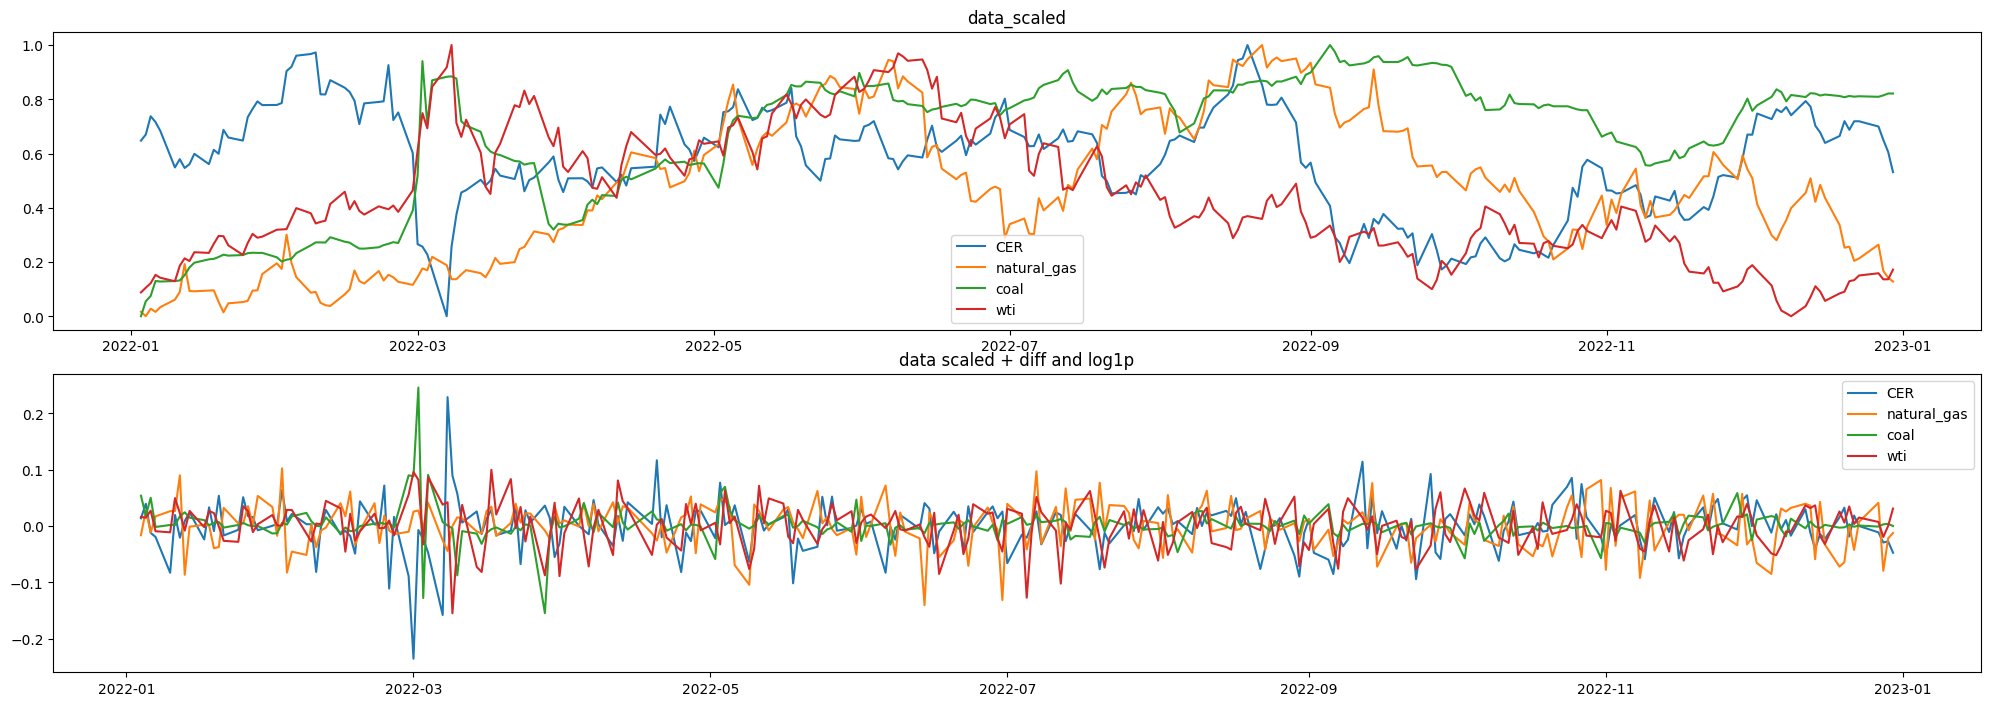

In [11]:
fig, axes = plt.subplots(nrows=2, figsize=(20,7))
fig.tight_layout()

axes[0].plot(data_scaled)
axes[0].set_title("data_scaled")
axes[0].legend(['CER','natural_gas','coal', 'wti'])

axes[1].plot(pd.DataFrame(data_scaled).apply(np.log1p).diff())
axes[1].set_title("data scaled + diff and log1p")
axes[1].legend(['CER','natural_gas','coal', 'wti'])

# axes[0] - 스케일 조정된 데이터 그래프 ('data_scaled'):

# x 축은 시간(일자)을 나타내며, y 축은 어떤 지표(예: ['CER','natural_gas','coal', 'wti'])의 가격을 나타냅니다.
# data_scaled는 데이터를 일정한 스케일로 조정한 결과이며, 이 그래프를 통해 스케일 조정된 데이터의 추세와 변동성을 확인할 수 있습니다.


# axes[1] - 스케일 조정 + 차분 + 로그 변환 그래프 ('data scaled + diff and log1p'):

# 이 그래프는 data_scaled 데이터에 차분(diff())과 로그 변환(np.log1p())을 순차적으로 적용한 결과를 시각화합니다.
# 차분은 현재 데이터와 이전 데이터의 차이를 계산하여 변화량을 나타냅니다.
# 로그 변환은 데이터의 스케일을 조정하고, 대체로 정규 분포 형태에 가깝게 만들어줄 수 있습니다.
# 이 그래프를 통해 스케일 조정, 차분, 로그 변환 등의 전처리가 적용된 데이터의 변화율이나 추세 변화를 확인할 수 있습니다.

In [12]:
def create_multivariate_data(data, window_size):
    y = data[window_size:]
    n = data.shape[0]
    X = np.stack([data[i: j]
                  for i, j in enumerate(range(window_size, n))], axis=0)
    return X, y

# 데이터 범위 지정
temp = data_scaled.loc['2022-01-01':]

# window크기 지정
window_size=10
X, y = create_multivariate_data(temp, window_size=window_size)
print(X.shape, y.shape)

(247, 10, 4) (247, 4)


In [13]:
# test size
size = 0.1
test_size=int(X.shape[0]*size)
train_size = X.shape[0]-test_size
print(train_size, test_size)

223 24


In [14]:
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(223, 10, 4) (223, 4) (24, 10, 4) (24, 4)


In [15]:
# validation size
size = 0.35
valid_size = int(X_train.shape[0]*size)
train2_size = X_train.shape[0]-valid_size
print(train2_size, valid_size, test_size)

145 78 24


In [16]:
X_train2, y_train2 = X_train[:train2_size], y_train[:train2_size]
X_valid, y_valid = X_train[train2_size:], y_train[train2_size:]
print(X_train2.shape, X_valid.shape, X_test.shape)

(145, 10, 4) (78, 10, 4) (24, 10, 4)


In [19]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [45]:
# n_features = 4 
# output_size = 4 

# model = Sequential([
#     LSTM(units=64,
#          dropout=0.3,
#          recurrent_dropout=0.1,
#          input_shape=(window_size, n_features),
#          return_sequences=False),

    
#     Dense(32),
#     Dense(output_size)
#     ])
    
# model.summary()

n_features = 4
output_size = 4

model = Sequential([
    LSTM(units=64,
         dropout=0.3,
         recurrent_dropout=0.1,
         input_shape=(window_size, n_features),
         return_sequences=True),
    LSTM(units=32,
         dropout=0.3,
         recurrent_dropout=0.1,
         return_sequences=True),
    LSTM(units=64,
         dropout=0.3,
         recurrent_dropout=0.1,
         return_sequences=False),
    Dense(32),
    Dense(output_size)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 10, 64)            17664     
                                                                 
 lstm_16 (LSTM)              (None, 10, 32)            12416     
                                                                 
 lstm_17 (LSTM)              (None, 64)                24832     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 4)                 132       
                                                                 
Total params: 57,124
Trainable params: 57,124
Non-trainable params: 0
_________________________________________________________________


In [46]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.0005)

model.compile(loss='mse', optimizer=optimizer)

checkpointer = ModelCheckpoint(filepath='./data',
                               verbose=1,
                               monitor='val_loss',
                               mode='min',
                               save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)
                               
result = model.fit(X_train2, 
                 y_train2, 
                 epochs=100,
                 batch_size=20,
                 shuffle=False,
                 validation_data=(X_valid, y_valid),
                 callbacks=[early_stopping, checkpointer],
                 verbose=1)

Epoch 1/100
7/8 [=========================>....] - ETA: 0s - loss: 0.2630
Epoch 1: val_loss improved from inf to 0.08858, saving model to ./data


2023-05-18 09:22:59.166371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:22:59.331620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:22:59.381790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and sh

INFO:tensorflow:Assets written to: ./data/assets


INFO:tensorflow:Assets written to: ./data/assets


8/8 [==============================] - 25s 2s/step - loss: 0.2588 - val_loss: 0.0886
Epoch 2/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0524
Epoch 2: val_loss improved from 0.08858 to 0.07874, saving model to ./data


2023-05-18 09:23:12.511736: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:23:12.690825: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:23:12.735536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and sh

INFO:tensorflow:Assets written to: ./data/assets


INFO:tensorflow:Assets written to: ./data/assets


8/8 [==============================] - 13s 2s/step - loss: 0.0532 - val_loss: 0.0787
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0472
Epoch 3: val_loss improved from 0.07874 to 0.05502, saving model to ./data


2023-05-18 09:23:25.307105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:23:25.493841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:23:25.550566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and sh

INFO:tensorflow:Assets written to: ./data/assets


INFO:tensorflow:Assets written to: ./data/assets


8/8 [==============================] - 13s 2s/step - loss: 0.0471 - val_loss: 0.0550
Epoch 4/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0382
Epoch 4: val_loss improved from 0.05502 to 0.03625, saving model to ./data


2023-05-18 09:23:37.608574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:23:37.737656: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:23:37.778701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and sh

INFO:tensorflow:Assets written to: ./data/assets


INFO:tensorflow:Assets written to: ./data/assets


8/8 [==============================] - 11s 2s/step - loss: 0.0378 - val_loss: 0.0362
Epoch 5/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0382
Epoch 5: val_loss did not improve from 0.03625
8/8 [==============================] - 0s 42ms/step - loss: 0.0379 - val_loss: 0.0486
Epoch 6/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0352
Epoch 6: val_loss did not improve from 0.03625
8/8 [==============================] - 0s 41ms/step - loss: 0.0354 - val_loss: 0.0437
Epoch 7/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0290
Epoch 7: val_loss improved from 0.03625 to 0.03521, saving model to ./data


2023-05-18 09:23:49.592704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:23:49.727354: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:23:49.767969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and sh

INFO:tensorflow:Assets written to: ./data/assets


INFO:tensorflow:Assets written to: ./data/assets


8/8 [==============================] - 13s 2s/step - loss: 0.0294 - val_loss: 0.0352
Epoch 8/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0294
Epoch 8: val_loss did not improve from 0.03521
8/8 [==============================] - 1s 79ms/step - loss: 0.0291 - val_loss: 0.0363
Epoch 9/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0278
Epoch 9: val_loss did not improve from 0.03521
8/8 [==============================] - 0s 48ms/step - loss: 0.0276 - val_loss: 0.0363
Epoch 10/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0261
Epoch 10: val_loss improved from 0.03521 to 0.03361, saving model to ./data


2023-05-18 09:24:03.391794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:24:03.559098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:24:03.616369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and sh

INFO:tensorflow:Assets written to: ./data/assets


INFO:tensorflow:Assets written to: ./data/assets


8/8 [==============================] - 14s 2s/step - loss: 0.0261 - val_loss: 0.0336
Epoch 11/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0272
Epoch 11: val_loss did not improve from 0.03361
8/8 [==============================] - 0s 45ms/step - loss: 0.0271 - val_loss: 0.0354
Epoch 12/100
8/8 [==============================] - ETA: 0s - loss: 0.0260
Epoch 12: val_loss did not improve from 0.03361
8/8 [==============================] - 1s 99ms/step - loss: 0.0260 - val_loss: 0.0368
Epoch 13/100
8/8 [==============================] - ETA: 0s - loss: 0.0260
Epoch 13: val_loss improved from 0.03361 to 0.03315, saving model to ./data


2023-05-18 09:24:18.398949: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:24:18.559048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:24:18.605842: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and sh

INFO:tensorflow:Assets written to: ./data/assets


INFO:tensorflow:Assets written to: ./data/assets


8/8 [==============================] - 12s 2s/step - loss: 0.0260 - val_loss: 0.0331
Epoch 14/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0270
Epoch 14: val_loss did not improve from 0.03315
8/8 [==============================] - 0s 43ms/step - loss: 0.0271 - val_loss: 0.0367
Epoch 15/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0260
Epoch 15: val_loss did not improve from 0.03315
8/8 [==============================] - 0s 44ms/step - loss: 0.0259 - val_loss: 0.0348
Epoch 16/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0240
Epoch 16: val_loss did not improve from 0.03315
8/8 [==============================] - 0s 44ms/step - loss: 0.0238 - val_loss: 0.0357
Epoch 17/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0233
Epoch 17: val_loss did not improve from 0.03315
8/8 [==============================] - 0s 43ms/step - loss: 0.0234 - val_loss: 0.0353
Epoch 18/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0243
Epoc

2023-05-18 09:24:32.144379: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:24:32.349391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:24:32.400900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and sh

INFO:tensorflow:Assets written to: ./data/assets


INFO:tensorflow:Assets written to: ./data/assets


8/8 [==============================] - 11s 2s/step - loss: 0.0239 - val_loss: 0.0328
Epoch 19/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0224
Epoch 19: val_loss did not improve from 0.03275
8/8 [==============================] - 0s 43ms/step - loss: 0.0225 - val_loss: 0.0345
Epoch 20/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0233
Epoch 20: val_loss improved from 0.03275 to 0.03197, saving model to ./data


2023-05-18 09:24:43.562531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:24:43.726277: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'while/Placeholder_2' with dtype float and shape [?,64]
	 [[{{node while/Placeholder_2}}]]
2023-05-18 09:24:43.766332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and sh

INFO:tensorflow:Assets written to: ./data/assets


INFO:tensorflow:Assets written to: ./data/assets


8/8 [==============================] - 13s 2s/step - loss: 0.0230 - val_loss: 0.0320
Epoch 21/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0237
Epoch 21: val_loss did not improve from 0.03197
8/8 [==============================] - 0s 50ms/step - loss: 0.0236 - val_loss: 0.0338
Epoch 22/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0234
Epoch 22: val_loss did not improve from 0.03197
8/8 [==============================] - 0s 50ms/step - loss: 0.0232 - val_loss: 0.0351
Epoch 23/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0230
Epoch 23: val_loss did not improve from 0.03197
8/8 [==============================] - 0s 51ms/step - loss: 0.0229 - val_loss: 0.0361
Epoch 24/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0222
Epoch 24: val_loss did not improve from 0.03197
8/8 [==============================] - 0s 53ms/step - loss: 0.0218 - val_loss: 0.0330
Epoch 25/100
8/8 [==============================] - ETA: 0s - loss: 0.0212
Epoc

In [33]:
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import minmax_scale

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
np.random.seed(42)

In [49]:
# rnn = Sequential()
# y_pred_train2 = pd.DataFrame(rnn.predict(X_train2),
#                       columns=['CER','natural_gas','coal', 'wti'],
#                       index=y_train2.index)
# y_pred_train2.info()

rnn = Sequential()
y_pred_train2 = pd.DataFrame(rnn.predict(X_train2).reshape(-1, output_size),
                             columns=['CER', 'natural_gas', 'coal', 'wti'],
                             index=np.repeat(y_train2.index, X_train2.shape[1]))
y_pred_train2.info()

5/5 [==============================] - 0s 3ms/step
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1450 entries, 2022-01-17 to 2022-08-09
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CER          1450 non-null   float32
 1   natural_gas  1450 non-null   float32
 2   coal         1450 non-null   float32
 3   wti          1450 non-null   float32
dtypes: float32(4)
memory usage: 34.0 KB


In [50]:
y_pred_valid = pd.DataFrame(rnn.predict(X_valid).reshape(-1, output_size),
                            columns=['CER', 'natural_gas', 'coal', 'wti'],
                            index=np.repeat(y_valid.index, X_valid.shape[1]))
y_pred_valid.info()

3/3 [==============================] - 0s 3ms/step
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 780 entries, 2022-08-10 to 2022-11-25
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CER          780 non-null    float32
 1   natural_gas  780 non-null    float32
 2   coal         780 non-null    float32
 3   wti          780 non-null    float32
dtypes: float32(4)
memory usage: 18.3 KB


In [51]:
y_pred_test = pd.DataFrame(rnn.predict(X_test).reshape(-1, output_size),
                           columns=['CER', 'natural_gas', 'coal', 'wti'],
                           index=np.repeat(y_test.index, X_test.shape[1]))
y_pred_test.info()

1/1 [==============================] - 0s 44ms/step
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 2022-11-28 to 2022-12-30
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CER          240 non-null    float32
 1   natural_gas  240 non-null    float32
 2   coal         240 non-null    float32
 3   wti          240 non-null    float32
dtypes: float32(4)
memory usage: 5.6 KB


In [52]:
# visualliztion

In [58]:
y_train2_ = y_train2 * (mm.data_max_ - mm.data_min_) + mm.data_min_
y_valid_ = y_valid * (mm.data_max_ - mm.data_min_) + mm.data_min_
y_test_ = y_test * (mm.data_max_ - mm.data_min_) + mm.data_min_

y_pred_train2_ = pd.DataFrame(
    y_pred_train2.values.reshape(-1, output_size),
    columns=['CER', 'natural_gas', 'coal', 'wti'],
    index=np.repeat(y_train2.index, X_train2.shape[1])
) * (mm.data_max_ - mm.data_min_) + mm.data_min_

y_pred_valid_ = pd.DataFrame(
    y_pred_valid.values.reshape(-1, output_size),
    columns=['CER', 'natural_gas', 'coal', 'wti'],
    index=np.repeat(y_valid.index, X_valid.shape[1])
) * (mm.data_max_ - mm.data_min_) + mm.data_min_

y_pred_test_ = pd.DataFrame(
    y_pred_test.values.reshape(-1, output_size),
    columns=['CER', 'natural_gas', 'coal', 'wti'],
    index=np.repeat(y_test.index, X_test.shape[1])
) * (mm.data_max_ - mm.data_min_) + mm.data_min_


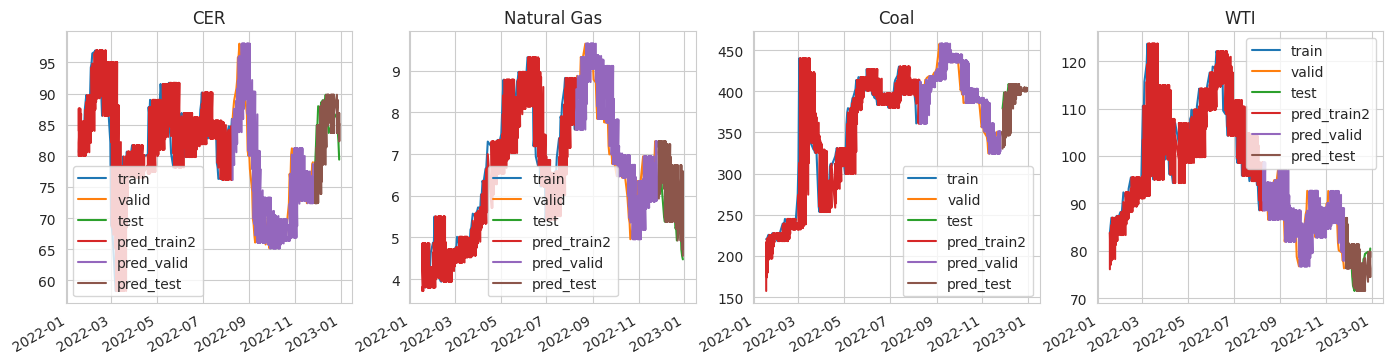

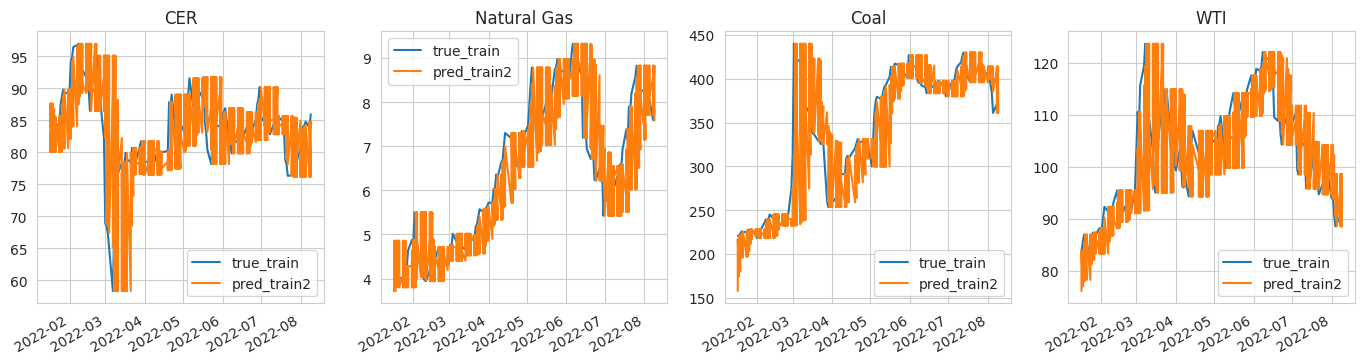

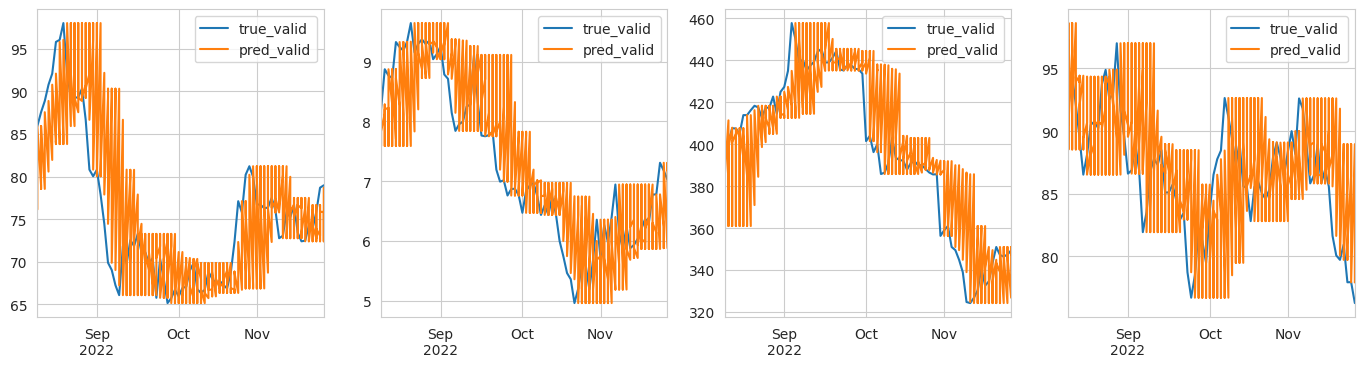

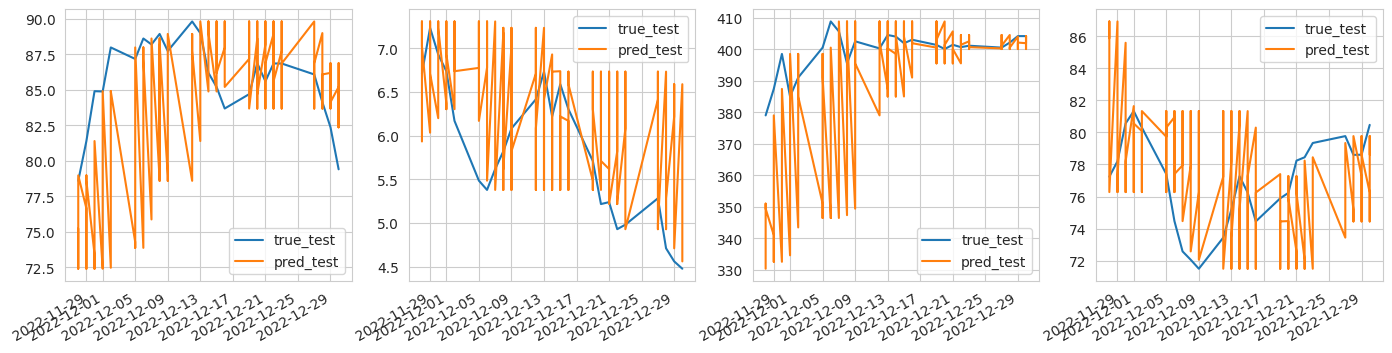

In [60]:

    
    
    
fig, axes = plt.subplots(ncols=4, figsize=(17,4))
col_dict = {"CER": "CER", "natural_gas": "Natural Gas", "coal": "Coal", "wti": "WTI"}
for i, col in enumerate(y_test.columns, 0):
    y_train2_.loc[:,col].plot(ax=axes[i], label='train', title=col_dict[col])
    y_valid_[col].plot(ax=axes[i], label='valid')
    y_test_[col].plot(ax=axes[i], label='test')
    y_pred_train2_[col].plot(ax=axes[i], label='pred_train2')
    y_pred_valid_[col].plot(ax=axes[i], label='pred_valid')
    y_pred_test_[col].plot(ax=axes[i], label='pred_test')
    axes[i].set_xlabel('')
    axes[i].legend()

fig, axes = plt.subplots(ncols=4, figsize=(17,4))
col_dict = {"CER": "CER", "natural_gas": "Natural Gas", "coal": "Coal", "wti": "WTI"}
for i, col in enumerate(y_test.columns, 0):
    y_train2_.loc[:,col].plot(ax=axes[i], label='true_train', title=col_dict[col])
    y_pred_train2_[col].plot(ax=axes[i], label='pred_train2')
    axes[i].set_xlabel('')
    axes[i].legend()   
    
    
fig, axes = plt.subplots(ncols=4, figsize=(17,4))
col_dict = {"CER": "CER", "natural_gas": "Natural Gas", "coal": "Coal", "wti": "WTI"}
for i, col in enumerate(y_test.columns, 0):
    y_valid_[col].plot(ax=axes[i], label='true_valid')
    y_pred_valid_[col].plot(ax=axes[i], label='pred_valid')
    axes[i].set_xlabel('')
    axes[i].legend()
    
fig, axes = plt.subplots(ncols=4, figsize=(17,4))
col_dict = {"CER": "CER", "natural_gas": "Natural Gas", "coal": "Coal", "wti": "WTI"}
for i, col in enumerate(y_test.columns, 0):
    y_test_[col].plot(ax=axes[i], label='true_test')
    y_pred_test_[col].plot(ax=axes[i], label='pred_test')
    axes[i].set_xlabel('')
    axes[i].legend()

In [111]:
def create_multivariate_data(data, window_size):
    y = data[window_size:, 0]  # 대상 변수 'CER'의 열 선택
    n = data.shape[0]
    X = np.stack([data[i: j, :]
                  for i, j in enumerate(range(window_size, n))], axis=0)
    return X, y

# 데이터 범위 지정
temp = data_scaled.loc['2022-01-01':]

# window 크기 지정
window_size = 10
X, y = create_multivariate_data(temp.values, window_size=window_size)

# 모델 아키텍처 수정
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 3)))  # 입력 변수의 개수를 3으로 설정
model.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

model.compile(loss='mse', optimizer=optimizer)

checkpointer = ModelCheckpoint(filepath='./model',
                               verbose=1,
                               monitor='val_loss',
                               mode='min',
                               save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

result = model.fit(X_train2, 
                   y_train2[:, np.newaxis],  # CER 값만 예측하도록 설정
                   epochs=100,
                   batch_size=20,
                   shuffle=False,
                   validation_data=(X_valid, y_valid[:, np.newaxis]),  # CER 값만 사용
                   callbacks=[early_stopping, checkpointer],
                   verbose=1)


Epoch 1/100


2023-05-18 14:26:10.920671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-18 14:26:10.924170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-18 14:26:10.927480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6/8 [=====================>........] - ETA: 0s - loss: 0.2338 

2023-05-18 14:26:13.992436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-18 14:26:13.996399: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-18 14:26:13.999592: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


Epoch 1: val_loss improved from inf to 0.04736, saving model to ./model


2023-05-18 14:26:14.676705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-18 14:26:14.682999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-18 14:26:14.687102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


8/8 [==============================] - 9s 883ms/step - loss: 0.2058 - val_loss: 0.0474
Epoch 2/100
6/8 [=====================>........] - ETA: 0s - loss: 0.1127
Epoch 2: val_loss did not improve from 0.04736
8/8 [==============================] - 0s 24ms/step - loss: 0.0948 - val_loss: 0.0604
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 0.0828
Epoch 3: val_loss did not improve from 0.04736
8/8 [==============================] - 0s 33ms/step - loss: 0.0828 - val_loss: 0.0877
Epoch 4/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0713
Epoch 4: val_loss did not improve from 0.04736
8/8 [==============================] - 0s 30ms/step - loss: 0.0689 - val_loss: 0.0640
Epoch 5/100
6/8 [=====================>........] - ETA: 0s - loss: 0.0717
Epoch 5: val_loss did not improve from 0.04736
8/8 [==============================] - 0s 19ms/step - loss: 0.0610 - val_loss: 0.0498
Epoch 6/100
6/8 [=====================>........] - ETA: 0s - loss: 0.0720
Epoch 6: va

In [119]:
# 0.647444	0.016526,0.000000,0.087739
# 0.670108	0.000000,0.055278,0.105172
# 0.737346	0.027825	0.074592	0.121648

# 입력 데이터 준비
input_data = np.array([[0.016526, 0.000000, 0.087739], [0.000000, 0.055278, 0.105172], [0.027825, 0.074592, 0.121648], [0.027825, 0.074592, 0.121648], [0.027825, 0.074592, 0.121648], [0.027825, 0.074592, 0.121648], [0.027825, 0.074592, 0.121648], [0.027825, 0.074592, 0.121648], [0.027825, 0.074592, 0.121648], [0.027825, 0.074592, 0.121648]])  # 예시 입력 데이터

# 입력 데이터 전처리
input_data_windowed = np.expand_dims(input_data, axis=0)  # 입력 데이터 차원 확장

# 'CER' 값 예측
cer_prediction = model.predict(input_data_windowed)

# 예측 결과 출력
print(cer_prediction)



1/1 [==============================] - 0s 440ms/step
[[0.08456289]]


2023-05-18 14:40:14.818314: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-18 14:40:14.820458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-18 14:40:14.824791: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [123]:
# 입력 데이터 전처리 함수
def preprocess_input_data(input_data):
    input_data_windowed = np.expand_dims(input_data, axis=0)  # 입력 데이터 차원 확장
    return input_data_windowed

# 입력 데이터
input_data = np.array([[0.000000,0.055278,0.105172]])  # 예시 입력 데이터

# 입력 데이터 전처리
input_data_windowed = preprocess_input_data(input_data)

# 'CER' 값 예측
cer_prediction = model.predict(input_data_windowed)

# 예측 결과 출력
print(cer_prediction)

1/1 [==============================] - 0s 42ms/step
[[0.0175795]]
